# Notebook for first figure in Lunch Talk: log(Age) = 8.2, Solar Metallicity, BPASS and MISTv1 (Using Fall 2020 Version of SPISEA on my Fork)



In this notebook, I will reproduce the HR diagram of the solar metallicity, middle-aged isochrone that was displayed in the Lunch Talk. (Figure 1)

First I create the BPASS isochrone.

In [1]:
import spisea
from spisea import synthetic

iso = synthetic.Isochrone_Binary(8.2, 0.0, 2000, 0.0)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to T= 50000 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 52330 logg=8.47
Changing to logg=5.00 for T= 44758 logg=8.49
Changing to logg=5.00 for T= 36146 logg=8.54
Changing to logg=5.00 for T= 38774 logg=8.52
Changing to logg=5.00 for T= 38361 logg=8.50
Changing to T= 50000 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 73161 logg=8.45
Changing to logg=5.00 for T= 37966 logg=5.70
Changing to logg=5.00 for T= 39842 logg=5.51
Changing to logg=5.00 for T= 32888 logg=5.68
Changing to logg=5.00 for T= 45669 logg=8.52
Changing to logg=5.00 for T= 35701 logg=8.52
Changing to logg=5.00 for T= 37547 logg=5.70
Changing to logg=5.00 for T= 45668 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 42302 logg=8.53
Changing to logg=5.00 for T= 38974 logg=5.38
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to logg=5.00 for T= 38750 logg=8.52
Changing to 

Creating isochrone for comparison (MIST)

In [2]:
import math
# New MIST v.1 isochrone for same metallicity
iso2 = synthetic.IsochronePhot(8.2, 0.0, 2000, math.log(1), recomp=True)

Isochrone generation took 23.428792 s.
Making photometry for isochrone: log(t) = 8.20  AKs = 0.00  dist = 2000
     Starting at:  2021-03-29 16:50:41.221187   Usually takes ~5 minutes
Starting filter: ubv,U   Elapsed time: 0.00 seconds
Starting synthetic photometry
M =   0.111 Msun  T =  2982 K  m_ubv_U = 28.94
M =   1.468 Msun  T =  7177 K  m_ubv_U = 14.83
M =   4.392 Msun  T =  4603 K  m_ubv_U = 11.93
M =   4.423 Msun  T =  3455 K  m_ubv_U = 12.78
M =   4.425 Msun  T = 23358 K  m_ubv_U = 6.34
M =   4.425 Msun  T = 170211 K  m_ubv_U = 11.96
M =   4.426 Msun  T = 157705 K  m_ubv_U = 17.19
Starting filter: ubv,B   Elapsed time: 1.78 seconds
Starting synthetic photometry
M =   0.111 Msun  T =  2982 K  m_ubv_B = 27.70
M =   1.468 Msun  T =  7177 K  m_ubv_B = 14.87
M =   4.392 Msun  T =  4603 K  m_ubv_B = 10.80
M =   4.423 Msun  T =  3455 K  m_ubv_B = 10.83
M =   4.425 Msun  T = 23358 K  m_ubv_B = 7.37
M =   4.425 Msun  T = 170211 K  m_ubv_B = 13.15
M =   4.426 Msun  T = 157705 K  m_ubv_B 

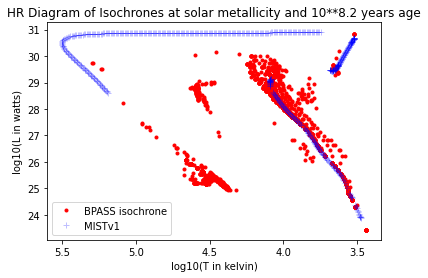

In [3]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.log10(iso.primaries['Teff']), np.log10(iso.primaries["L"]),
         "r.")
plt.plot(np.log10(iso.secondaries['Teff']), np.log10(iso.secondaries["L"]),
         "r.")
plt.plot(np.log10(iso.singles['Teff']), np.log10(iso.singles["L"]),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]),
         "b+", label="MISTv1", alpha=0.25)
plt.xlabel("log10(T in kelvin)")
plt.ylabel("log10(L in watts)")
plt.title("HR Diagram of Isochrones at solar" +
          " metallicity and 10**8.2 years age")
plt.gca().invert_xaxis()
plt.legend()

In [4]:
np.where(iso.singles['mass'] < 1)[0]

array([ 4,  7, 12, 39])